# POI Taxonomy Analysis (Google Places)

In [1]:
import os

os.chdir("/home/tales/dev/master/mdc_analysis/")
print("working dir", os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt
import json

from src.poi_grabber import google_places

working dir /home/tales/dev/master/mdc_analysis


In [2]:
d = google_places.load_all_google_places_data()

In [3]:
d.head()

,name,place_id,plus_code,price_level,rating,types,user_ratings_total,vicinity,latitude,longitude
place_id,,,,,,,,,,
ChIJTcpEIDQujEcRfRIRizbvj4k,Office d'impôt des districts de Lausanne et Ou...,ChIJTcpEIDQujEcRfRIRizbvj4k,"{'compound_code': 'GJCQ+J2 Lausanne, Switzerla...",NaN,2.2,"[accounting, finance, point_of_interest, local...",30.0,"Rue Caroline 11 Bis, Lausanne",46.521553,6.637505
ChIJsWOoPqBljEcR8n6Pb3BfON4,Nettoie Net Sa,ChIJsWOoPqBljEcR8n6Pb3BfON4,"{'compound_code': '653C+XH Geneva, Switzerland...",NaN,NaN,"[point_of_interest, establishment]",NaN,"Route de Frontenex 86, Genève",46.204900,6.171475
ChIJPV-d_9dkjEcRh-AFXijs5H0,Graphiste Imprimeur Genève Agence BESTRIBUTION,ChIJPV-d_9dkjEcRh-AFXijs5H0,"{'compound_code': '644R+WJ Geneva, Switzerland...",NaN,NaN,"[store, point_of_interest, establishment]",NaN,"Rue de Cornavin 3, Genève",46.207296,6.141589
ChIJV141IonejkcRBlYuYvp5zD4,Mr. Gilles Rivier,ChIJV141IonejkcRBlYuYvp5zD4,"{'compound_code': '69PQ+52 Sion, Switzerland',...",NaN,NaN,"[point_of_interest, establishment]",NaN,"Avenue du Grand-Champsec 90, Sion",46.235488,7.387556
ChIJ6TtT3J1EjEcRdmsz6L2gHTU,institut beauté lys,ChIJ6TtT3J1EjEcRdmsz6L2gHTU,"{'compound_code': 'C7F6+9W Gland, Switzerland'...",NaN,4.2,"[beauty_salon, point_of_interest, establishment]",6.0,"Rue du Borgeaud 10B, Gland",46.423477,6.262349


## Types

### diversity

In [4]:
types_list = pd.Series(d["types"].sum())
types_list = types_list[(types_list != "establishment") & (types_list != "point_of_interest")]
types_list = types_list.apply(lambda value : pd.Series(value).drop_duplicates().tolist()[0])

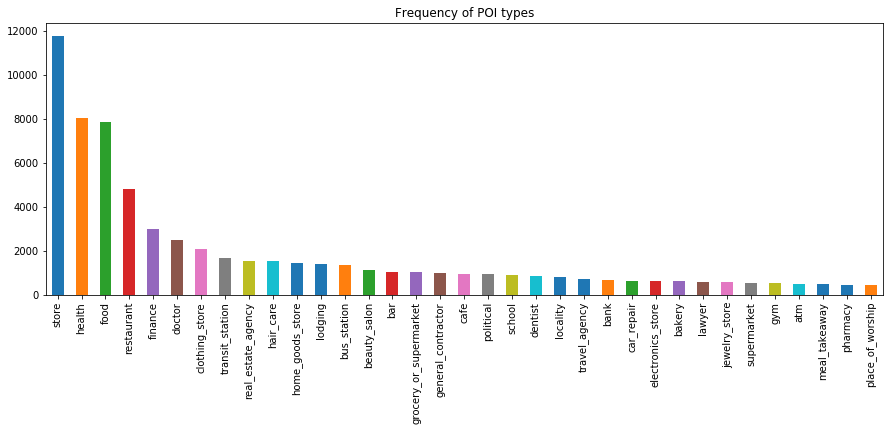

In [5]:
f, ax = plt.subplots(figsize=(15,5))
types_list.astype(str).value_counts().head(35).plot.bar(title="Frequency of POI types")

### size

In [6]:
# types_list.head()

In [7]:
d["types"].apply(len).describe()

count    74832.000000
mean         2.988347
std          1.119032
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         14.000000
Name: types, dtype: float64

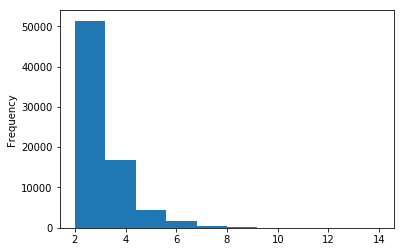

In [8]:
d["types"].apply(len).plot.hist(bins=10)

#### Types of similar places

In [9]:
d[d["name"] == "McDonald’s"]["types"].astype(str).value_counts()

['restaurant', 'meal_takeaway', 'cafe', 'food', 'point_of_interest', 'establishment']    20
['restaurant', 'meal_takeaway', 'food', 'point_of_interest', 'establishment']            19
Name: types, dtype: int64

## Useful functions

In [10]:
def term_list_index(term, lista):
    if term in lista:
        return lista.index(term)
    else:
        return -1

def term_index_len(term, types_series):
    term_index = types_series.apply(lambda lista : term_list_index(term, lista))
    term_types_len = types_series.apply(lambda lista : len(lista))

    return pd.DataFrame({"index": term_index, "len": term_types_len})

def left_right_term(term, types_series):
    lefts = []
    rights = []

    term_index_len_df = term_index_len(term, types_series)

    for type_row in types_series.loc[term_index_len_df[term_index_len_df["index"] >= 0].index]:
        left = type_row[0:type_row.index(term)]
        lefts = lefts + left
        right = type_row[type_row.index(term) + 1:]
        rights = rights + right

    lefts = pd.Series(lefts).rename({0: "left"})
    rights = pd.Series(rights).rename({0: "right"})

    lr = lefts.value_counts().to_frame().merge(rights.value_counts().to_frame(), how="outer",
                                                 left_index=True,
                                                 right_index=True)
    
    return lr.sort_values(by=["0_x", "0_y"], ascending=False).rename({"0_x": "left", "0_y": "right"}, axis=1)

def term_placement_analisis(lr, show=True):
    right = lr[(lr["left"].isna()) & (~lr["right"].isna())]
    left = lr[(lr["right"].isna()) & (~lr["left"].isna())]
    both_valid = lr[~(lr["right"].isna()) & (~lr["left"].isna())]
    both_nan = lr[(lr["right"].isna()) & (lr["left"].isna())]
    
    if show:
    
        print("RIGHT side occurrences")
        print()
        print(right)
        print("---")
        print()
        print("LEFT side occurrences")
        print(left)
        print("---")
        print()
        print("BOTH sides occurrences")
        print(both_valid)
        print("---")
        print()
    return {"right": right, "left": left, "both": both_valid}

# left vs right: term ocurrences 

In [11]:
health_lr = left_right_term('health', d["types"])
lr = term_placement_analisis(health_lr)

RIGHT side occurrences

                         left   right
establishment             NaN  8062.0
point_of_interest         NaN  8062.0
food                      NaN    69.0
local_government_office   NaN    18.0
restaurant                NaN    13.0
lodging                   NaN     8.0
general_contractor        NaN     2.0
laundry                   NaN     1.0
---

LEFT side occurrences
                          left  right
doctor                  2511.0    NaN
dentist                  868.0    NaN
gym                      520.0    NaN
pharmacy                 468.0    NaN
physiotherapist          448.0    NaN
hair_care                287.0    NaN
beauty_salon             167.0    NaN
spa                      152.0    NaN
insurance_agency          97.0    NaN
clothing_store            78.0    NaN
finance                   33.0    NaN
shoe_store                27.0    NaN
grocery_or_supermarket    25.0    NaN
home_goods_store          15.0    NaN
veterinary_care           15.0    NaN

In [12]:
# term = "food"

# print("Occurrences for term: {}".format(term))
# print("\n\n")
# lr_health = left_right_term(term, d["types"])
# lr = term_placement_analisis(lr_health)

In [13]:
term = "school"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: school



RIGHT side occurrences

                         left  right
establishment             NaN  881.0
point_of_interest         NaN  881.0
general_contractor        NaN    1.0
local_government_office   NaN    1.0
---

LEFT side occurrences
                 left  right
gym              20.0    NaN
food              3.0    NaN
beauty_salon      2.0    NaN
hair_care         2.0    NaN
physiotherapist   2.0    NaN
travel_agency     2.0    NaN
bar               1.0    NaN
church            1.0    NaN
doctor            1.0    NaN
furniture_store   1.0    NaN
lawyer            1.0    NaN
mosque            1.0    NaN
museum            1.0    NaN
restaurant        1.0    NaN
shoe_store        1.0    NaN
spa               1.0    NaN
---

BOTH sides occurrences
                   left  right
health             45.0    7.0
university         21.0    7.0
home_goods_store   13.0    1.0
electronics_store  11.0    1.0
accounting          3.0    2.0
finance             3.0  

In [14]:
term = "bar"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: bar



RIGHT side occurrences

                   left   right
establishment       NaN  1049.0
point_of_interest   NaN  1049.0
food                NaN   547.0
store               NaN    86.0
lodging             NaN    66.0
meal_takeaway       NaN    33.0
spa                 NaN     8.0
movie_theater       NaN     2.0
place_of_worship    NaN     2.0
university          NaN     2.0
health              NaN     1.0
home_goods_store    NaN     1.0
laundry             NaN     1.0
natural_feature     NaN     1.0
school              NaN     1.0
storage             NaN     1.0
---

LEFT side occurrences
                        left  right
bowling_alley            4.0    NaN
parking                  4.0    NaN
casino                   3.0    NaN
grocery_or_supermarket   3.0    NaN
beauty_salon             2.0    NaN
airport                  1.0    NaN
clothing_store           1.0    NaN
gym                      1.0    NaN
hair_care                1.0    NaN
shopping_mall   

In [15]:
term = "store"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: store



RIGHT side occurrences

                         left    right
establishment             NaN  11788.0
point_of_interest         NaN  11788.0
lodging                   NaN     18.0
local_government_office   NaN      1.0
natural_feature           NaN      1.0
---

LEFT side occurrences
                     left  right
electronics_store   633.0    NaN
jewelry_store       563.0    NaN
supermarket         551.0    NaN
pharmacy            468.0    NaN
shoe_store          460.0    NaN
furniture_store     441.0    NaN
cafe                351.0    NaN
convenience_store   290.0    NaN
car_repair          235.0    NaN
florist             226.0    NaN
car_dealer          219.0    NaN
gas_station         167.0    NaN
bicycle_store       133.0    NaN
hair_care           133.0    NaN
beauty_salon        126.0    NaN
meal_takeaway       108.0    NaN
bar                  86.0    NaN
department_store     82.0    NaN
finance              64.0    NaN
plumber              53.

In [16]:
term = "hair_care"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: hair_care



RIGHT side occurrences

                    left   right
establishment        NaN  1531.0
point_of_interest    NaN  1531.0
health               NaN   287.0
store                NaN   133.0
hospital             NaN     6.0
home_goods_store     NaN     2.0
school               NaN     2.0
bar                  NaN     1.0
food                 NaN     1.0
general_contractor   NaN     1.0
lodging              NaN     1.0
restaurant           NaN     1.0
university           NaN     1.0
---

LEFT side occurrences
                 left  right
beauty_salon    289.0    NaN
clothing_store    4.0    NaN
dentist           1.0    NaN
gym               1.0    NaN
shoe_store        1.0    NaN
---

BOTH sides occurrences
        left  right
spa      1.0   96.0
doctor   1.0   21.0
---



In [17]:
term = "natural_feature"

print("Occurrences for term: {}".format(term))
print("\n\n")
lr_health = left_right_term(term, d["types"])
lr = term_placement_analisis(lr_health)

Occurrences for term: natural_feature



RIGHT side occurrences

                   left  right
establishment       NaN    7.0
point_of_interest   NaN    7.0
---

LEFT side occurrences
            left  right
food         2.0    NaN
bar          1.0    NaN
lodging      1.0    NaN
pet_store    1.0    NaN
restaurant   1.0    NaN
store        1.0    NaN
---

BOTH sides occurrences
Empty DataFrame
Columns: [left, right]
Index: []
---



# Analysing Both Sides Occurrences

In [18]:
both_sides = []

for categ in pd.Series(types_list).drop_duplicates():
    lr_categ = left_right_term(categ, d["types"])
    lr = term_placement_analisis(lr_categ, show=False)

    for related_categ, row in lr["both"].iterrows():
        rate = max(row["left"] / row["right"], row["right"] / row["left"])
        
        both_sides.append({"categ": categ,
                           "related": related_categ,
                           "left_freq": row["left"], 
                           "right_freq": row["right"],
                           "rate": rate})
        
both_sides = pd.DataFrame(both_sides)[["categ", "related", "rate", "left_freq", "right_freq"]]

In [19]:
both_sides.head()

,categ,related,rate,left_freq,right_freq
0,accounting,lawyer,2.333333,9.0,21.0
1,accounting,school,1.500000,2.0,3.0
2,finance,jewelry_store,5.000000,5.0,25.0
3,finance,school,1.500000,2.0,3.0
4,local_government_office,point_of_interest,12.590909,277.0,22.0


In [20]:
both_sides.sort_values("rate").head()

,categ,related,rate,left_freq,right_freq
208,locksmith,hardware_store,1.0,1.0,1.0
137,gas_station,car_dealer,1.0,1.0,1.0
182,art_gallery,book_store,1.0,1.0,1.0
183,art_gallery,cafe,1.0,1.0,1.0
187,shopping_mall,furniture_store,1.0,1.0,1.0


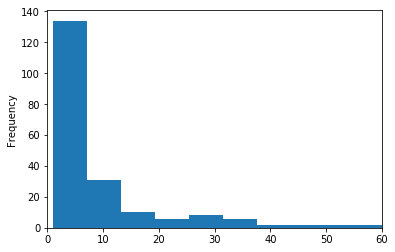

In [21]:
both_sides["rate"].plot.hist(bins=100, xlim=(0,60))

Discarding frequencies 1

In [22]:
both_sides[(both_sides["left_freq"] < 3) & (both_sides["right_freq"] < 3)]

,categ,related,rate,left_freq,right_freq
32,cafe,art_gallery,1.0,1.0,1.0
73,shoe_store,hospital,1.0,1.0,1.0
79,doctor,pharmacy,2.0,2.0,1.0
91,electronics_store,art_gallery,2.0,2.0,1.0
112,pharmacy,doctor,2.0,1.0,2.0
127,electrician,plumber,1.0,1.0,1.0
137,gas_station,car_dealer,1.0,1.0,1.0
161,book_store,furniture_store,1.0,2.0,2.0
162,book_store,department_store,2.0,2.0,1.0
165,book_store,art_gallery,1.0,1.0,1.0


In [23]:
both_sides[both_sides["rate"] <= 1.6].head(8)

,categ,related,rate,left_freq,right_freq
1,accounting,school,1.500000,2.0,3.0
3,finance,school,1.500000,2.0,3.0
27,cafe,restaurant,1.184358,179.0,212.0
32,cafe,art_gallery,1.000000,1.0,1.0
40,clothing_store,shoe_store,1.491228,85.0,57.0
54,restaurant,cafe,1.184358,212.0,179.0
64,transit_station,train_station,1.066038,106.0,113.0
72,shoe_store,clothing_store,1.491228,57.0,85.0


There are some relations with rate close to 1 with many occurences

In [24]:
both_sides[(both_sides["left_freq"] > 1) & (both_sides["right_freq"] > 1)].sort_values("rate").head(8)

,categ,related,rate,left_freq,right_freq
205,furniture_store,book_store,1.000000,2.0,2.0
161,book_store,furniture_store,1.000000,2.0,2.0
110,meal_takeaway,bakery,1.031250,32.0,33.0
128,bakery,meal_takeaway,1.031250,33.0,32.0
64,transit_station,train_station,1.066038,106.0,113.0
177,train_station,transit_station,1.066038,113.0,106.0
124,bar,bakery,1.125000,8.0,9.0
132,bakery,bar,1.125000,9.0,8.0


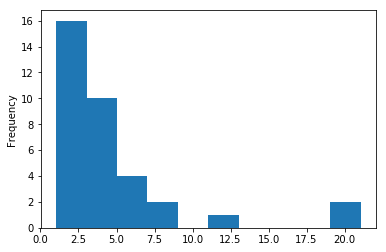

In [25]:
both_sides[(both_sides["left_freq"] > 10) & (both_sides["right_freq"] > 10)]["rate"].plot.hist()

# Analising mosts specific categories

In [26]:
import copy

In [27]:
def remove_words_from_list(lista, words_to_remove=["establishment", "point_of_interest"]):
    lista = copy.deepcopy(lista)
    for word_to_remove in words_to_remove:
        if word_to_remove in lista:
            lista.remove(word_to_remove)
    return lista

In [28]:

clean_types = d["types"].copy().apply(lambda value : remove_words_from_list(value))
leftmost = clean_types[clean_types.astype(str) != "[]"].apply(lambda value : value[-1])

print(len(leftmost.drop_duplicates()), "specific categories")
print(len(pd.DataFrame(types_list).drop_duplicates()), "all categories")

67 specific categories
108 all categories


# Automatic Category Hierarchy

In [29]:
def categ_relations(types):
    relations = []

    relations.append(("NULL", types[0]))
    
    for i in range(len(types) - 1):
        relation = (types[i], types[i + 1])
        relations.append(relation)
    
    relations.append((types[-1], "."))
    
    return relations

In [30]:
relations = []

for types in d["types"]:
    for relation in categ_relations(types):
        row = {"category": relation[0], "parent": relation[1]}
        relations.append(row)

In [31]:
len(relations)

298456

### Relations

In [32]:
relations_df = pd.DataFrame(relations)
relations_df.sample(6)

,category,parent
257864,point_of_interest,establishment
219337,point_of_interest,establishment
19054,establishment,.
78002,establishment,.
245984,NULL,grocery_or_supermarket
47055,establishment,.


In [53]:
relations_freq = relations_df.groupby("parent")["category"].value_counts().to_frame().rename({'category': 'freq'}, axis=1).reset_index().sort_values("freq", ascending=False)
relations_freq.head(12)

,parent,category,freq
0,.,establishment,73887
213,establishment,point_of_interest,73610
570,point_of_interest,NULL,33216
571,point_of_interest,store,11486
572,point_of_interest,health,6778
573,point_of_interest,food,4740
239,food,restaurant,4501
663,restaurant,NULL,3779
738,store,food,2874
574,point_of_interest,finance,2865


In [54]:
def child(category, relations_freq=relations_freq):
    return relations_freq[relations_freq["parent"] == category].sort_values("freq", ascending=False)

def parent(category, relations_freq=relations_freq):
    return relations_freq[relations_freq["category"] == category].sort_values("freq", ascending=False)

def build_tree_json(relations_freq):
    tree_json = {}
    for i, row in relations_freq.sort_values("freq", ascending=False).iterrows():
        if row["parent"] in tree_json.keys():
            tree_json[row["parent"]].append(row["category"])
        else:
            tree_json[row["parent"]] = [row["category"]]
    
    return tree_json

In [56]:
child("point_of_interest")

,parent,category,freq
570,point_of_interest,NULL,33216
571,point_of_interest,store,11486
572,point_of_interest,health,6778
573,point_of_interest,food,4740
574,point_of_interest,finance,2865
575,point_of_interest,transit_station,1480
576,point_of_interest,lodging,1411
577,point_of_interest,real_estate_agency,1337
578,point_of_interest,hair_care,1121
579,point_of_interest,general_contractor,1008


In [49]:
tree_json = build_tree_json(relations_freq)

In [51]:
for parent in tree_json.keys():
    print("parent: {}".format(parent))
    print("chdildren: {}".format(tree_json[parent]))
    print()

parent: .
chdildren: ['establishment', 'political']

parent: establishment
chdildren: ['point_of_interest', 'local_government_office']

parent: point_of_interest
chdildren: ['NULL', 'store', 'health', 'food', 'finance', 'transit_station', 'lodging', 'real_estate_agency', 'hair_care', 'general_contractor', 'school', 'beauty_salon', 'travel_agency', 'lawyer', 'bar', 'place_of_worship', 'car_repair', 'parking', 'insurance_agency', 'hospital', 'electrician', 'museum', 'university', 'gas_station', 'spa', 'park', 'art_gallery', 'laundry', 'painter', 'library', 'shopping_mall', 'premise', 'bus_station', 'night_club', 'car_rental', 'movie_theater', 'light_rail_station', 'storage', 'veterinary_care', 'embassy', 'funeral_home', 'locksmith', 'city_hall', 'police', 'car_wash', 'cemetery', 'taxi_stand', 'fire_station', 'moving_company', 'local_government_office', 'amusement_park', 'subway_station', 'roofing_contractor', 'zoo', 'airport', 'stadium', 'natural_feature', 'courthouse', 'bowling_alley', 

In [35]:
parent("cafe")

,parent,category,freq
241,food,cafe,723
666,restaurant,cafe,191
45,bar,cafe,22
30,bakery,cafe,10
362,health,cafe,4
485,meal_takeaway,cafe,3
519,night_club,cafe,2
565,place_of_worship,cafe,2
18,art_gallery,cafe,1
177,department_store,cafe,1


In [36]:
parent("restaurant")

,parent,category,freq
239,food,restaurant,4501
43,bar,restaurant,105
85,cafe,restaurant,92
480,meal_takeaway,restaurant,90
518,night_club,restaurant,18
29,bakery,restaurant,14
476,meal_delivery,restaurant,8
510,museum,restaurant,1
832,university,restaurant,1


In [52]:
child("food")

,parent,category,freq
239,food,restaurant,4501
240,food,grocery_or_supermarket,826
241,food,cafe,723
242,food,NULL,689
243,food,bakery,418
244,food,bar,141
245,food,supermarket,119
246,food,convenience_store,96
247,food,liquor_store,86
248,food,health,56


In [38]:
child(".")

,parent,category,freq
0,.,establishment,73887
1,.,political,945


In [39]:
for i, children_df in children(".").iterrows():
    print(children_df["category"])

NameError: name 'children' is not defined

Many categories have another categories relations on both sides. <br>
I have considered only the relation on the most frequent side.

In [ ]:
def clean_both_sides(both_df):
    
    

In [ ]:
term_lr = left_right_term('health', d["types"])
lr = term_placement_analisis(term_lr, show=False)
lr["both"]